A drug is generally administered to a patient in certain patterns or in regular
intervals of time. For example Chemotherapy which is drug treatment in case of Cancer is
generally given to patients in an interval 3-4 weeks, i.e. every 3-4 weeks patients are
administered with the drug.

Similarly to Chemotherapy, “Target Drug” is also administered/prescribed in certain patterns,
we want to analyse in what patterns “Target Drug“ is administered/prescribed to patients,
there might be multiple patterns in which “Target Drug” is administered/prescribed, come up
with an analysis which to extract the dominant patterns in the data using clustering or other
unsupervised techniques.
Visualise the prescription patterns with time on X-axis (month) and prescriptions on Y-axis
for each of the patterns you are able to extract(Below is an example of a prescription pattern,
where a prescription is made at least once in the first two months followed by one
prescription for every two months).

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Subaranjani\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Preparation

    The code starts by reading the dataset from a CSV file using pd.read_csv().
    The 'Date' column is converted to a datetime format using pd.to_datetime() for easier manipulation.
    The 'Month' column is extracted from the 'Date' column using .dt.month to represent the month component of the dates.

In [2]:
# Step 1: Data Preparation
df = pd.read_parquet(r'C:\Users\Subaranjani\Downloads\Structured_Data_Assignment\Structured_Data_Assignment\train.parquet')
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

## Pattern Extraction

    The DataFrame is grouped by both 'Patient-Uid' and 'Month' columns using groupby().
    The .size() function is applied to count the number of prescriptions for each group.
    The results are stored in a new DataFrame with columns 'Patient-Uid', 'Month', and 'Prescriptions'.
    The grouped DataFrame is further grouped by 'Month' to calculate the average number of prescriptions per month using .mean().
    The resulting DataFrame, average_prescriptions, contains the 'Month' and 'Prescriptions' columns with average values.

In [3]:
# Step 2: Pattern Extraction
grouped = df.groupby(['Patient-Uid', 'Month']).size().reset_index(name='Prescriptions')
average_prescriptions = grouped.groupby('Month')['Prescriptions'].mean().reset_index()

## Visualization

    -- A new figure is created with a size of 12x8 inches using plt.figure().
    The violin plot is created using sns.violinplot(). It visualizes the distribution of prescriptions for each month, represented by the 'Month' and 'Prescriptions' columns from the grouped DataFrame. The inner=None parameter removes the inner bars, and color='lightgray' sets the color of the violins.
    -- The strip plot is created using sns.stripplot(). It adds individual data points on top of the violin plot, allowing us to see the distribution more clearly. The 'Month' and 'Prescriptions' columns from the grouped DataFrame are used, and dodge=True separates the points for each month horizontally. The linewidth=1 parameter sets the width of the lines, and palette='Set2' determines the color palette.
    -- The line plot is created using plt.plot(). It plots the average number of prescriptions per month using the 'Month' and 'Prescriptions' columns from the average_prescriptions DataFrame. The marker='o' and markersize=8 parameters set the marker style and size, and color='red' determines the color of the line.
    -- Axes labels, a title, and a legend are added using plt.xlabel(), plt.ylabel(), plt.title(), and plt.show() respectively.

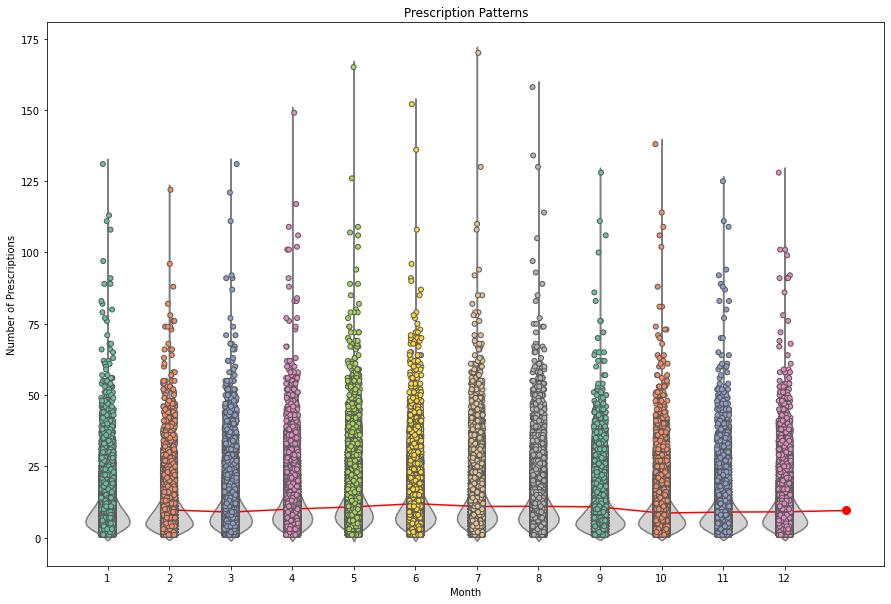

In [4]:
# Step 3: Visualization
plt.figure(figsize=(15, 10))

# Violin Plot
sns.violinplot(data=grouped, x='Month', y='Prescriptions', inner=None, color='lightgray')
sns.stripplot(data=grouped, x='Month', y='Prescriptions', dodge=True, linewidth=1, palette='Set2')
# Line Plot
plt.plot(average_prescriptions['Month'].values, average_prescriptions['Prescriptions'].values, marker='o', markersize=8, color='red')

plt.xlabel('Month')
plt.ylabel('Number of Prescriptions')
plt.title('Prescription Patterns')
plt.show()

This code prepares the data, extracts patterns, and visualizes the prescription patterns using a violin plot, strip plot, and line plot.